## **Assignment 1**

Written portion pdf is attached to assignment. Instructions are found at https://mattabrown.github.io/425/assignments/Assignment1.html



In [86]:
# import the packages we need for this assignment
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2

import matplotlib.pyplot as plt

#Part 2: Gaussian Filtering

def boxfilter(n):
    '''
    Returns an n x n box filter 
    
    Args:
        n: the size of the box filter
    Returns:
        numpy array of size n x n
        
    Assert: n is an odd number
    '''
    
    assert n % 2 == 1, "Dimension must be odd" # n must be an odd number
    
    # create an n x n array of ones
    box = np.ones((n,n))
    # normalize to sum to 1
    box = box / n**2
    return box 


In [87]:
boxfilter(5)
#boxfilter(4)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [88]:
def gauss1d(sigma):
    """ 
    Create a 1D Gaussian filter of size 6*sigma rounded up to next odd integer
    
    Input: Sigma
    Output: 1D Gaussian filter
    """
    
    # calculate the size of the filter
    L = 6*sigma
    L = math.ceil(L)
    # make sure the size is odd
    if L % 2 == 0:
        L = L + 1
            
    # create the x values for the filter
    mag = L//2
    x = np.arange(-mag, L//2+1)
    
    # Apply gaussian function to the x values and normalize
    gauss_filter = np.exp(- x**2 / (2*sigma**2))
    gauss_filter = gauss_filter / np.sum(gauss_filter)
    
    return gauss_filter


# Display the outputs for different sigma values
display('sigma=0.3:', gauss1d(0.3))
display('sigma=0.5:', gauss1d(0.5))
display('sigma=1:', gauss1d(1))
display('sigma=2:', gauss1d(2))

'sigma=0.3:'

array([0.00383626, 0.99232748, 0.00383626])

'sigma=0.5:'

array([0.10650698, 0.78698604, 0.10650698])

'sigma=1:'

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

'sigma=2:'

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

'sigma=0.5:'

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

'sigma=1:'

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

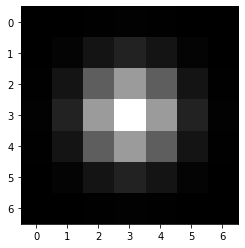

In [89]:
def gauss2d(sigma):
    """ 
    Create a 2D Gaussian filter of size 6*sigma rounded up to next odd integer
    
    Input: Sigma
    Output: 2D Gaussian filter
    """
    
    # We recall that the 2D Gaussian filter is the product of two 1D Gaussian filters
    # because it is separable. So we take the outer product of the 1D Gaussian filter
    
    gauss_x = gauss1d(sigma)
    gauss_xy = np.outer(gauss_x, gauss_x)
    
    # Normalize the filter
    gauss_xy = gauss_xy / np.sum(gauss_xy)
    
    return gauss_xy

display('sigma=0.5:', gauss2d(0.5))
display('sigma=1:', gauss2d(1))

plt.imshow(gauss2d(1), cmap='gray')
    


In [90]:
def convolve2d_manual(array, filter):
    """ 
    Perform 2D convolution on an array with a filter
     - Assumes zero paddings
    
    Input: array, filter
    Output: convolved array
    """
    
    # Get the dimensions of the array and the filter
    array_row, array_col = array.shape
    filter_row, filter_col = filter.shape
    
    #Calculate the padding needed assuming odd filter size
    x_pad = (filter_row - 1) // 2
    y_pad = (filter_col - 1) // 2
    
    # Add zero padding to the array
    # Create a new array with correct dimensions
    padded_array = np.pad(array, ((x_pad, x_pad), (y_pad, y_pad)), 'constant')
    
    # Allocate space for the filtered array
    filtered_array = np.zeros(array.shape)
    # Iterate throuh all pixels and apply the filter
    for i in range(array_row):
        for j in range(array_col):
            # Apply the filter taking the sum of the element-wise product 
            # Uses sliding window over correctly padded array 
            filtered_array[i][j] = np.sum(padded_array[i:i+filter_row, j:j+filter_col] * filter)

    return filtered_array

array = np.array([[1,2,3],[4,5,6],[7,8,9]])
filter = np.array([[0,0,0],[1,0,-1],[0,0,0]])
convolve2d_manual(array, filter)

def gaussconvolve2d_manual(array,sigma):
    """ 
    Perform 2D Gaussian convolution on an array with a filter
     - Assumes zero paddings
    
    Input: array, sigma
    Output: convolved array
    """
    
    # Create a 2D Gaussian filter
    gauss_filter = gauss2d(sigma)
    
    # Perform 2D convolution with the Gaussian filter
    return convolve2d_manual(array, gauss_filter)   

### Apply newly built 2D gaussian filter to image of a dog

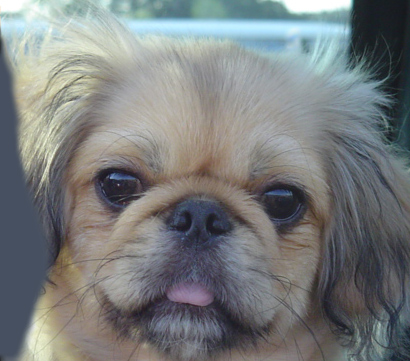

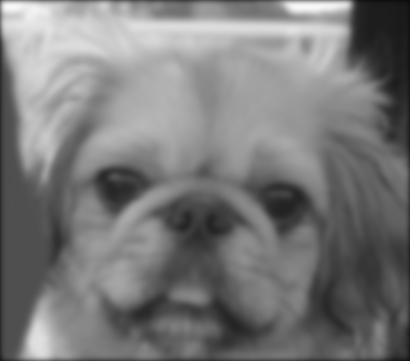

In [91]:
# Import image
dog_img = Image.open('dog.jpg')
display(dog_img)
#Make a greyscale copy
dog_img = dog_img.convert('L')
# Get array representation
dog_array = np.asarray(dog_img)

# Apply the Gaussian filter
dog_blur_array = gaussconvolve2d_manual(dog_array, 3)
# Convert back to 0-255 range (8-bit pixels)
dog_blur = Image.fromarray(dog_blur_array.astype('uint8'))
# Show the artwork
display(dog_blur)
dog_blur.save('dog_blur.jpg')

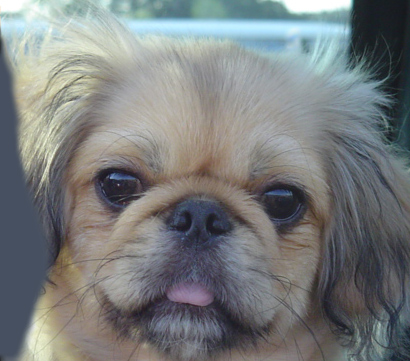

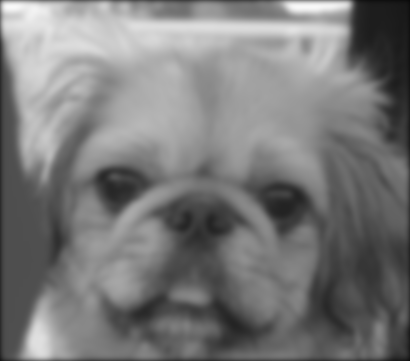

In [92]:
def gaussconvolve2d_scipy(array,sigma):
    """ Applies a gaussian filter to an image array using scipy

    Args:
        array np.array: image to be filtered
        sigma float: value for sigma in the gaussian filter

    Returns:
        array_filtered: the filtered image result
    """
    
    # Create filter
    gauss_filter = gauss2d(sigma)
    # Apply convolution using scipy
    array_filtered = signal.convolve2d(array, gauss_filter, mode='same')
    
    return array_filtered

# Import image
dog_img = Image.open('dog.jpg')
display(dog_img)
#Make a greyscale copy
dog_img = dog_img.convert('L')
# Get array representation
dog_array = np.asarray(dog_img)

# Apply the Gaussian filter
dog_blur_array = gaussconvolve2d_scipy(dog_array, 3)
# Convert back to 0-255 range (8-bit pixels)
dog_blur = Image.fromarray(dog_blur_array.astype('uint8'))
# Show the artwork
display(dog_blur)
dog_blur.save('dog_blur.jpg')


In [93]:
# Evaluate the time complexity of both options
import time 

n= 5
sigma = 10
# Get current time
t1 = time.time()
for i in range(1,n):
    dog_blur_array = gaussconvolve2d_manual(dog_array, sigma)
duration1 = (time.time()-t1)/n

# Get current time
t2 = time.time()
for i in range(1,n):
    dog_blur_array = gaussconvolve2d_scipy(dog_array, sigma)
duration2 = (time.time()-t2)/n

# Print or show a comparison of the two methods
print('Manual method takes', duration1, 'seconds')
print('Scipy method takes', duration2, 'seconds')

Manual method takes 0.829878282546997 seconds
Scipy method takes 0.7265115261077881 seconds


# Part 3 Hybrids

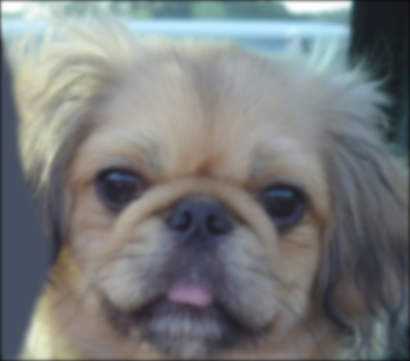

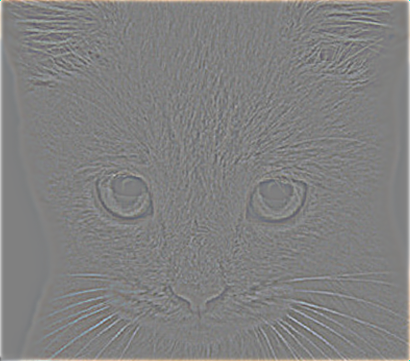

285.87305


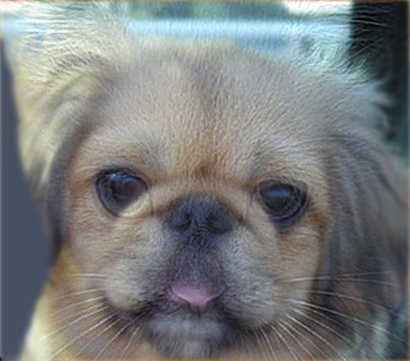

In [94]:
# Import dog image
dog_img = Image.open('dog.jpg')
# Convert to array for each color channel
dog_array = np.asarray(dog_img, dtype='float32')
# Apply the Gaussian filter to each color channel
dog_blur_array = np.copy(dog_array)
for i in range(3):
    dog_blur_array[:,:,i] = gaussconvolve2d_scipy(dog_array[:,:,i], sigma_low)

# Convert back to 0-255 range (8-bit pixels)
dog_blur = Image.fromarray(dog_blur_array.astype('uint8'))


cat_img = Image.open('hybrid_img/0a_cat.bmp')
# Convert to array for each color channel
cat_array = np.asarray(cat_img,dtype='float32')
# Apply the Gaussian filter to each color channel
cat_blur_array = np.copy(cat_array)
for i in range(3):
    cat_blur_array[:,:,i] = gaussconvolve2d_scipy(cat_array[:,:,i], sigma_low)

# Extract the hf image by subtracting the blurred image from the original
# Rescaled because the overall mean of subtracted image is 0    
high_freq_array = (cat_array - cat_blur_array)
# Add 128 offset to make the image visible
high_freq_cat = high_freq_array + 128
# Convert back to 0-255 range (8-bit pixels)
cat_hf = Image.fromarray(high_freq_cat.astype('uint8'))

display(dog_blur)
display(cat_hf)

hybrid_array = high_freq_array + dog_blur_array
print(max(hybrid_array.flatten()))

#clip the values to be between 0 and 255
hybrid_array = np.clip(hybrid_array, 0, 255)
hybrid_img = Image.fromarray(hybrid_array.astype('uint8'))
display(hybrid_img)

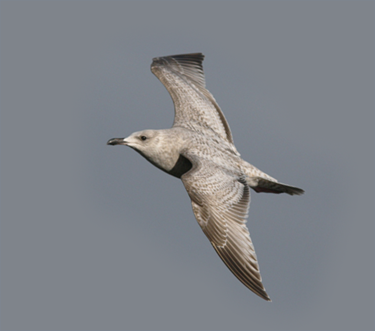

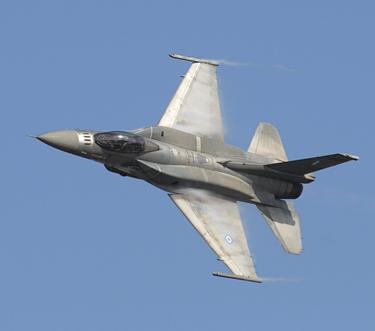

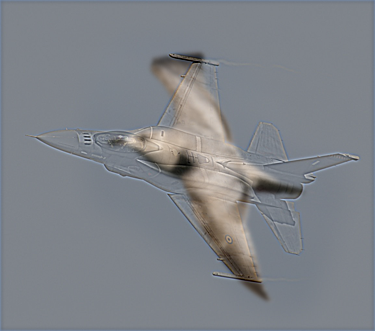

In [95]:

def hybridize(img1, img2, sigma1, sigma2):
    """ Hybridize two images by applying a low-pass filter to one and a high-pass filter to the other
    
    Args:
        img1: image to be filtered with low-pass filter
        img2: image to be filtered with high-pass filter
        sigma1: sigma value for low-pass filter
        sigma2: sigma value for high-pass filter
        
    Returns:
        hybrid_img: hybrid image
    """
    
    # Convert images to arrays
    img1_array = np.asarray(img1, dtype='float32')
    img2_array = np.asarray(img2, dtype='float32')
    
    img1_blur_array = np.copy(img1_array)
    img2_hf_array = np.copy(img2_array)
    for i in range(3):
        img1_blur_array[:,:,i] = gaussconvolve2d_scipy(img1_array[:,:,i], sigma1)
        img2_hf_array[:,:,i] = img2_array[:,:,i] - gaussconvolve2d_scipy(img2_array[:,:,i], sigma2)
    
    # Add the two images together
    hybrid_array = img1_blur_array + img2_hf_array
    
    # Clip the values to be between 0 and 255
    hybrid_array = np.clip(hybrid_array, 0, 255)
    
    # Convert back to 0-255 range (8-bit pixels)
    hybrid_img = Image.fromarray(hybrid_array.astype('uint8'))
    
    return hybrid_img

# Import dog image
dog_img = Image.open('dog.jpg')
cat_img = Image.open('hybrid_img/0a_cat.bmp')
sigma_low =  2
sigma_high = 8
hybrid_img = hybridize(dog_img, cat_img, sigma_low, sigma_high)

# display(dog_img)
# display(cat_img )
# display(hybrid_img)

bird_img = Image.open('hybrid_img/4a_bird.bmp')
plane_img = Image.open('hybrid_img/4b_plane.bmp')
sigma_low =  2
sigma_high = 1.5
hybrid_img = hybridize( bird_img,plane_img, sigma_low, sigma_high)
display(bird_img)
display(plane_img )
display(hybrid_img)

### Part 4 

'Gaussain Blur'

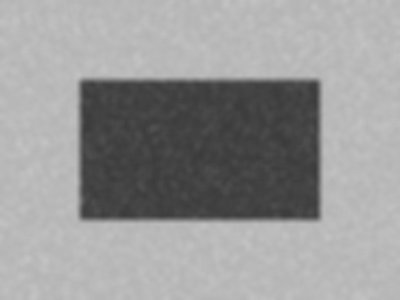

'Bilateral Filter'

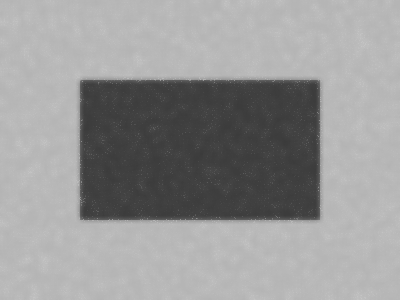

'Median Filter'

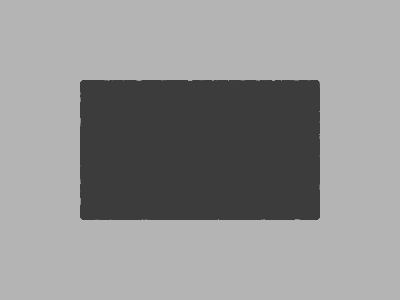

'Gaussain Blur'

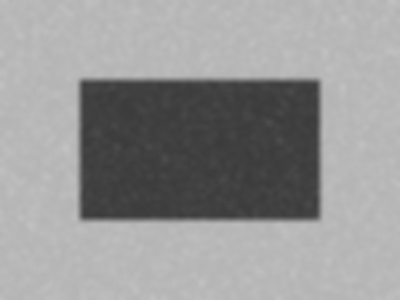

'Bilateral Filter'

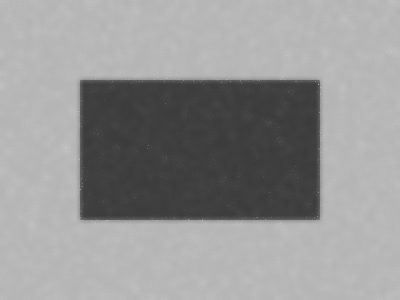

'Median Filter'

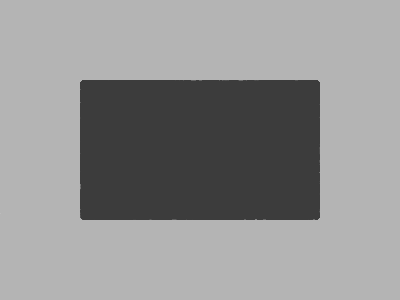

In [136]:


def applyFilters(img):
    img_array = np.asarray(img, dtype='float32')
    
    n = 9
    gauss = cv2.GaussianBlur(img_array,(n,n), 3)
    display('Gaussain Blur', Image.fromarray(gauss.astype('uint8')))
    
    n=11    
    bilat = cv2.bilateralFilter(img_array,n,95,10)
    display('Bilateral Filter', Image.fromarray(bilat.astype('uint8')))
    
    n=5
    med = cv2.medianBlur(img_array,n)
    display('Median Filter', Image.fromarray(med.astype('uint8')))

img_speckle = Image.open('box_speckle.png')
img_gauss = Image.open('box_gauss.png')    
applyFilters(img_speckle)
applyFilters(img_gauss)

'Gaussain Blur'

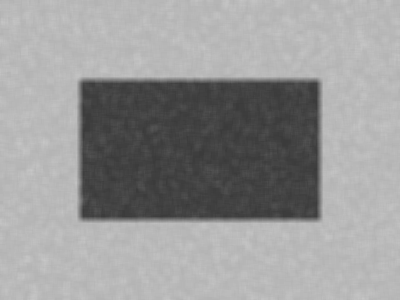

'Bilateral Filter'

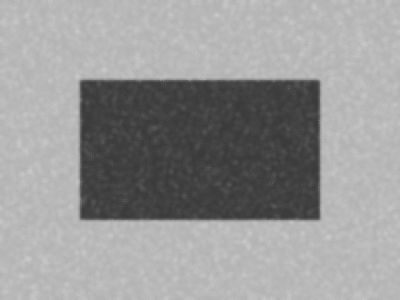

'Median Filter'

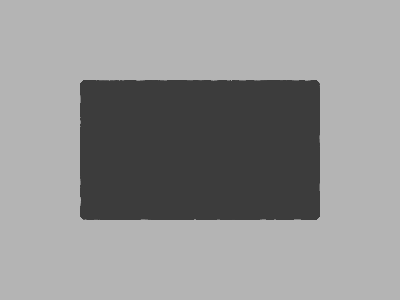

'Gaussain Blur'

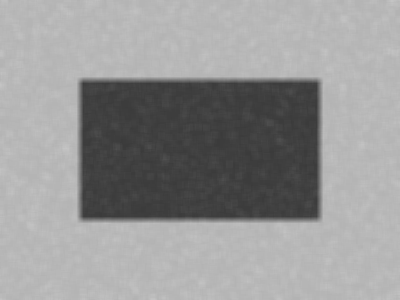

'Bilateral Filter'

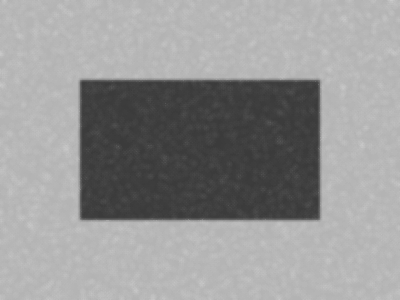

'Median Filter'

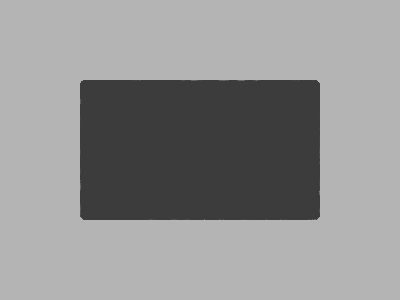

In [137]:
def applyFilters(img):
    img_array = np.asarray(img, dtype='float32')
    
    n = 7
    gauss = cv2.GaussianBlur(img_array,(n,n), 50)
    display('Gaussain Blur', Image.fromarray(gauss.astype('uint8')))
    
    n=7   
    bilat = cv2.bilateralFilter(img_array,n,150,150)
    display('Bilateral Filter', Image.fromarray(bilat.astype('uint8')))
    
    n=7
    med = cv2.medianBlur(img_array,n)
    display('Median Filter', Image.fromarray(med.astype('uint8')))

img_speckle = Image.open('box_speckle.png')
img_gauss = Image.open('box_gauss.png')    
applyFilters(img_speckle)
applyFilters(img_gauss)

(640, 480) RGB PNG


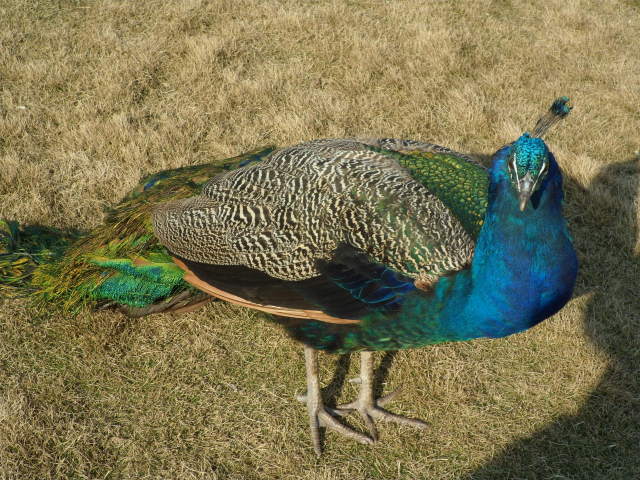

lol


In [97]:
# open the test image
# Note: If you didn't launch Python from the same directory where you saved
#       the file, peacock.png, you'll need to provide the full path name as
#       the argument to Image.open
im = Image.open('peacock.png')

# display relevant Image class attributes: dimensions (width, height),
# pixel format and file format
#
# Python 2 version
#     print im.size, im.mode, im.format
# Python 3 version
print(im.size, im.mode, im.format)

# Note: PIL does not have a built-in image display tool.  Instead, principally
# for debugging, there's a show method which saves an image to a temporary file
# on disk and calls a platform dependent external display utility
# (the default being "xv" on unix, and the "Paint" program on Windows).


# For Jupyter Notebook display will show the image localy
display(im)
print("lol")